## Dependencias

In [1]:
from keras.models import load_model
from keras import models
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

## Cargar modelo entrenado

In [2]:
modelo = load_model('cats_vs_dogs.h5')
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

## Cargar Imagen y convertirla en tensor

In [30]:
imagen = 'datos/jaime/5.jpeg'

In [31]:
imagen = image.load_img(imagen,target_size=(150,150))

In [32]:
tensor = image.img_to_array(imagen)
tensor = np.expand_dims(tensor,axis=0)
tensor /=255

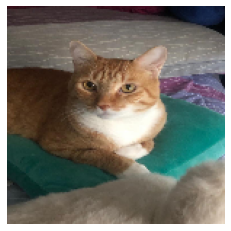

In [33]:
plt.imshow(tensor[0])
plt.axis(False)
plt.show()

## Obtención de capas de activación

In [34]:
capas_de_salida = [capa.output for capa in modelo.layers[:8]]
modelo_de_activacion = models.Model(inputs=modelo.input,outputs=capas_de_salida)
activaciones = modelo_de_activacion.predict(tensor)
activaciones[0].shape

(1, 148, 148, 32)

## Visualización de canales

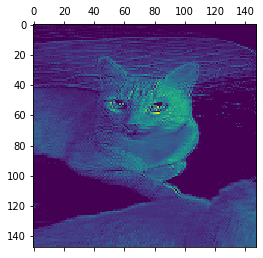

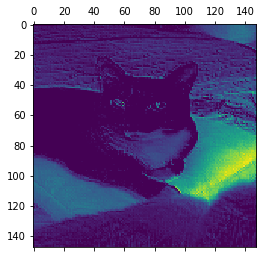

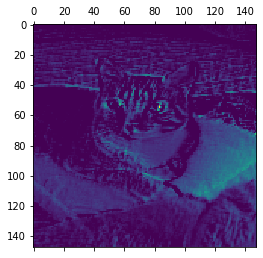

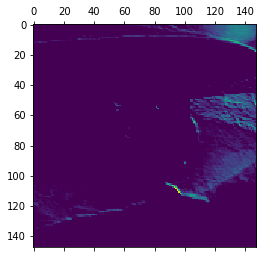

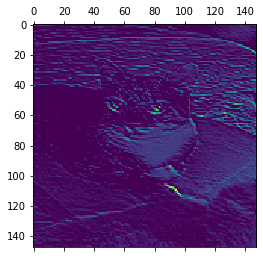

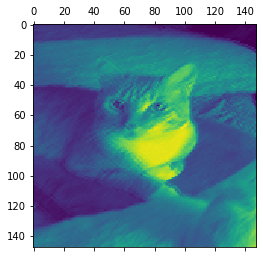

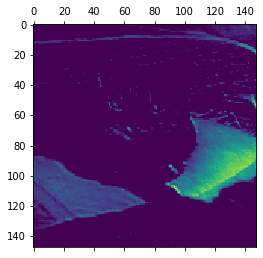

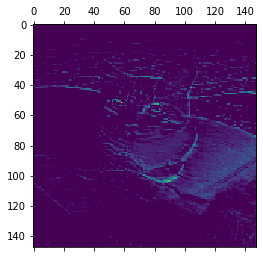

In [35]:
for i in range(1,8+1):
    plt.matshow(activaciones[0][0,:,:,i],cmap='viridis')

## Visualización de cada canal para cada capa de activación

In [36]:
nombres_capas = list(map(lambda x:x.name, modelo.layers[:8]))
imagenes_por_fila = 16    

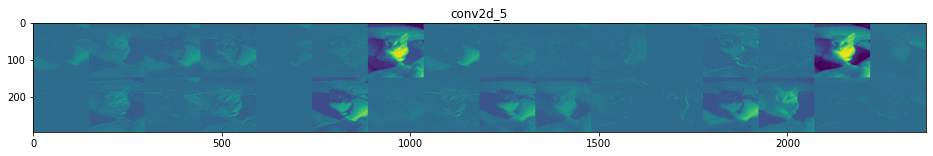

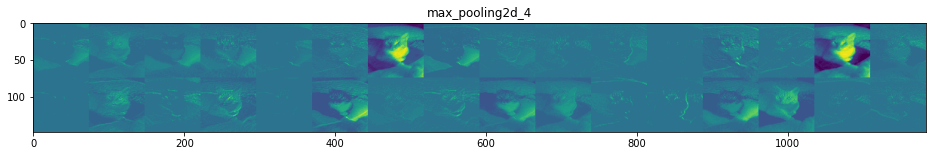

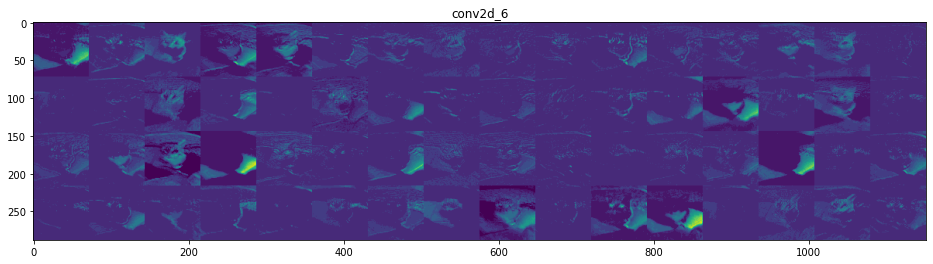

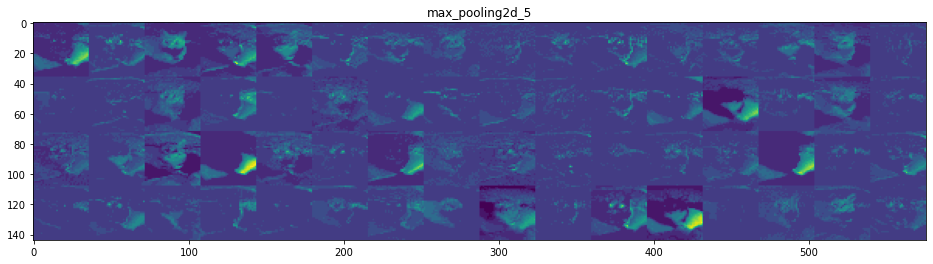

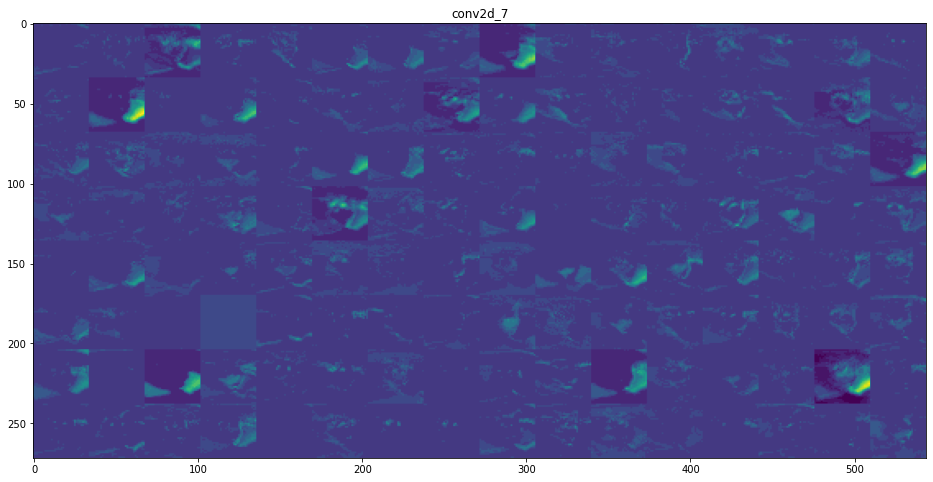

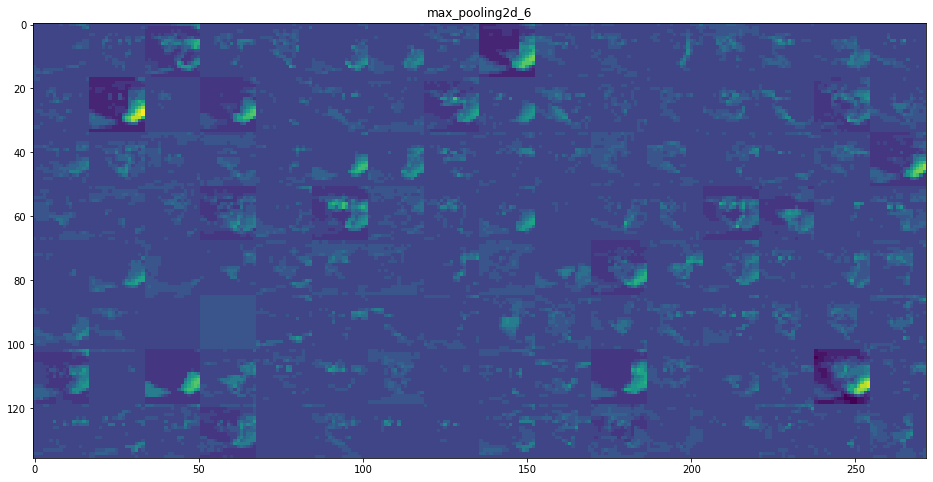

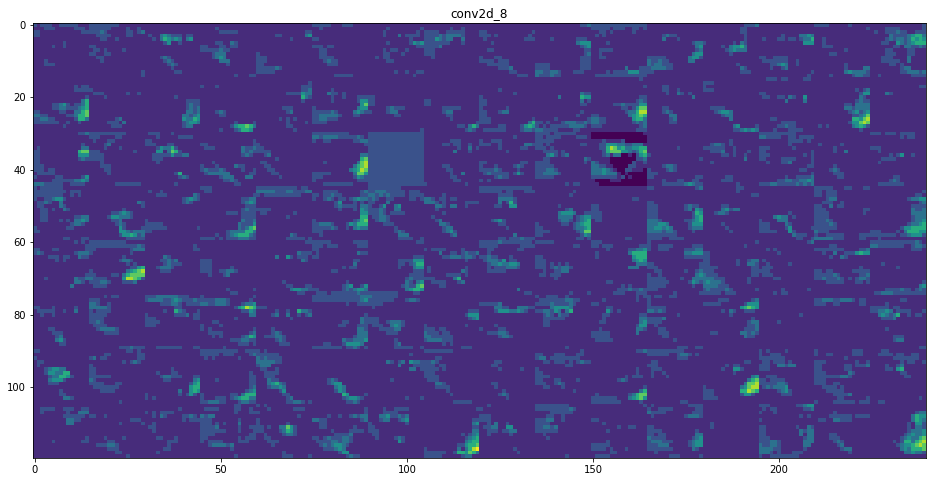

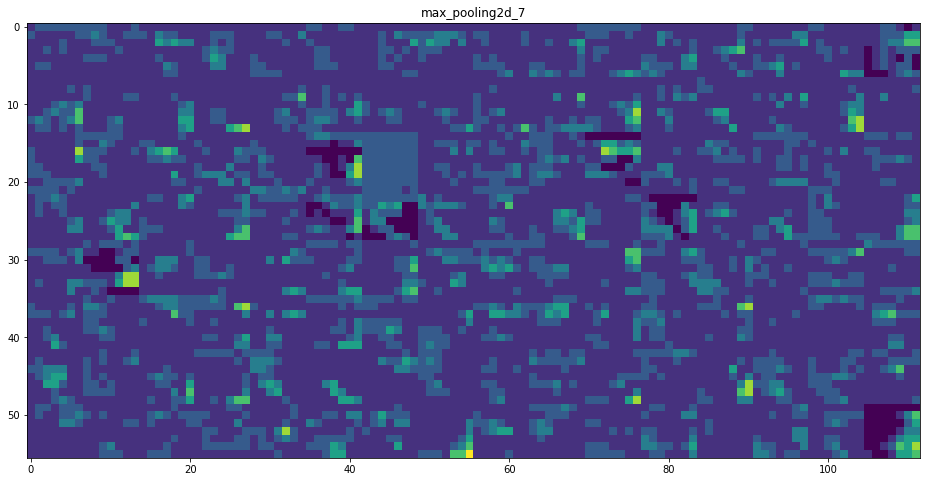

In [37]:
for nombre,activacion in zip(nombres_capas,activaciones):
    carac = activacion.shape[-1]
    tam = activacion.shape[1]
    cols = carac//imagenes_por_fila
    gradilla = np.zeros((tam*cols,imagenes_por_fila*tam))
    for col in range(cols):
        for fila in range(imagenes_por_fila):
            canal = activacion[0,:,:,col*imagenes_por_fila+fila]
            canal-= canal.mean()
            canal*=64
            canal+=128
            canal = np.clip(canal,0,255).astype('uint8')
            gradilla[col*tam:(col+1)*tam,fila*tam :(fila+1)*tam] = canal
    escala = 1/tam
    plt.figure(figsize=(escala*gradilla.shape[1],escala*gradilla.shape[0]))
    plt.title(nombre)
    plt.grid(False)
    plt.imshow(gradilla,aspect='auto',cmap='viridis')